# Práctica 0: Python
---
### Autores:
Raúl Murillo Montero - 5º Doble Grado en Ingeniería Informática - Matemáticas   
Miguel Sierra Esteso - 4º Grado en Ingeniería Informática

---
**Fecha de entrega:** 4 de octubre de 2018, 18.00h

#### Descripción de la práctica
En esta primera práctica has de implementar un algoritmo de integración numérica basado en el método de Monte Carlo.
Dada una función real e integrable de una sola variable $f(x)$, y su integral $F(x)$, la integral definida de $f(x)$ entre $a$ y $b$ viene dada por la expresión $$I = \int_a^b f(x) dx = F(b) - F(a)$$ como el cálculo simbólico de la integral $F(x)$ puede ser muy difícil, se utilizan métodos numéricos que aproximan su valor utilizando la interpretación geométrica de la integral definida que se corresponde con el área bajo la curva $f(x)$ entre $a$ y $b$.
Dada una función $f(x)$ positiva en el intervalo $x \in [a;b]$ cuyo valor máximo es $M$ dentro de ese intervalo, podemos definir un rectángulo de área $(b-a)\times M$ como el que se muestra en la figura para el intervalo $[0;2]$. El método de Monte Carlo para el cálculo de la integral consiste en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:
$$I\approx \frac{N_{debajo}}{N_{total}}(b-a)M$$ donde $N_{debajo}$ es el número de puntos $(x, y)$ generados aleatoriamente cuya coordenada $y$ es menor que el valor de la función $f(x)$ para ese valor de $x$ y $N_{total}$ es el número total de puntos generados aleatoriamente dentro del rectángulo.


#### Implementación de la solución
Antes de mostrar el código desarrollado para el correcto funcionamiento de la práctica, debemos importar los módulos necesarios para el desarrollo de esta práctica:

- **Time**: para calcular el tiempo de ejecución del método de Monte Carlo.
- **Numpy**: para realizar operaciones con vectores.
- **Pyplot**, de la librería **Matplotlib**: para dibujar gráficas que reflejan los resultados de la práctica.
- **Integrate**, de la librería **Scipy**: para calcular el valor de la integral de una función en un intervalo.


In [1]:
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

1) Versión iterativa

In [2]:
def integra_mc_it(fun, a, b, num_puntos=10000):
    tic = time.process_time()
    # Get M
    interval = np.linspace(a, b, num_puntos)
    M = fun(interval).max()
    #for x in interval:
    #    if fun(x) > M:
    #        M = fun(x)    
    # Generate the random points in the square
    # and check points under the function
    N_under = 0
    for i in range(num_puntos):       
        xrand = np.random.uniform(a, b)
        yrand = np.random.uniform(0, M)
        if fun(xrand) > yrand:
            N_under = N_under + 1
    sol = N_under/num_puntos*(b-a)*M
    toc = time.process_time()
    return (sol, toc-tic)

# I = integra_mc_it(np.sin, 0.0, np.pi)
# print('The integral under the curve is ' + str(I))

2) Versión paralela

In [3]:
def integra_mc_fast(fun, a, b, num_puntos=10000):
    tic = time.process_time()
    # get M
    interval = np.linspace(a, b, num_puntos)
    f = fun(interval)
    M = np.max(f)
    # Generate the random points in the square   
    xrand = np.random.uniform(a, b, num_puntos)
    yrand = np.random.uniform(0, M, num_puntos)
    # Check points under the function
    fx = fun(xrand)
    N_under = sum(fx > yrand)
    sol = N_under/num_puntos*(b-a)*M
    toc = time.process_time()
    return (sol, toc-tic)

# I = integra_mc(np.cos, 0.0, np.pi)
# print('The integral under the curve is ' + str(I))

3) Pruebas de ejecución

Para poner a prueba la eficacia del método de Monte Carlo utilizaremos una función cuya integral sea conocida. Por ejemplo, sabemos que la integral de la función $sin$ en el intervalo $[0,\pi]$ es igual a 2 (aunque lo comprobaremos con la función `integrate.quad` de Python.

* Iterative case
The integral under the curve is 1.9923979625464039
Elapsed time (iterative): 0.046875
--------------------------------------------------------------------------------
* Vectorized case
The integral under the curve is 1.9754333630545238
Elapsed time (vector): 0.015625


<IPython.core.display.Javascript object>


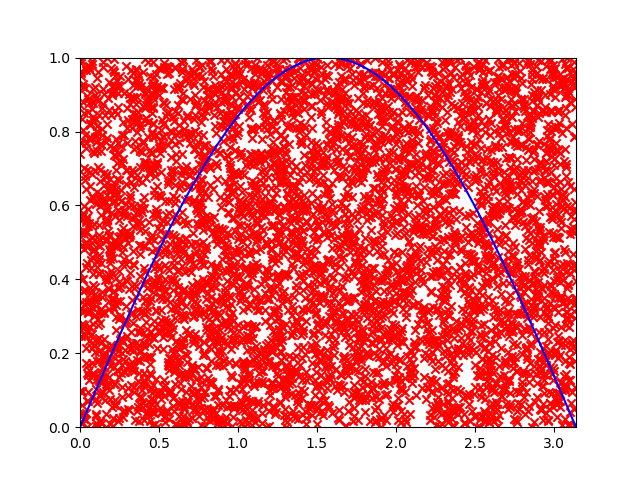

Aplying a Python function, the integral obtained is 2.0


In [6]:
N = 5000
print('* Iterative case')
sol_it = integra_mc_it(np.sin, 0.0, np.pi, N)
print('The integral under the curve is ' + str(sol_it[0]))
print('Elapsed time (iterative): ' + str(sol_it[1]))
print ('-'*80)
print('* Vectorized case')
sol_vec = integra_mc_fast(np.sin, 0.0, np.pi, N)
print('The integral under the curve is ' + str(sol_vec[0]))
print('Elapsed time (vector): ' + str(sol_vec[1]))

x = np.linspace(0.0, np.pi, N)
plt.figure()
ejes = plt.gca()
m = np.max(np.sin(x))
prop_ejes = [0.0, np.pi, 0, m]
ejes.axis(prop_ejes)
plt.plot(x, np.sin(x), '-', c='blue')
x_aleatorios = np.random.uniform(0.0, np.pi, N)
y_aleatorios = np.random.uniform(0, m, N)
plt.scatter(x_aleatorios, y_aleatorios, marker='x', c='red')
plt.show()
print('Aplying a Python function, the integral obtained is ' + str(integrate.quad(np.sin, 0.0, np.pi)[0]))

#### Conclusión
Los resultados obtenidos muestran con evidencia aquello que ya sabíamos de antemano: aplicar funciones y algoritmos de manera vectorizada es mucho más eficiente que hacerlo de manera iterativa. Además el algoritmo de Monte Carlo es bastante eficiente para el cálculo de integrales, pues los errores obtenidos son entorno a la tercera cifra decimal.